<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento


###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [1]:
import pandas as pd
import tweepy

In [2]:
# Leer llaves
keys = pd.read_csv("desktop/archivos/keys.csv", sep=';', header=None)
keys = dict(zip(keys[0],keys[1]))

In [3]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
#recolectar tweets
tweets = tweepy.Cursor(api.search,
 q=['WOM Colombia -RT'], #palabra
 lang='es', #idioma
 tweet_mode='extended',
 include_rts=False).items(200)

In [5]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [6]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date',  'user_location', 'id', 'link']
data.head()

,tweet,date,user_location,id,link
0,"Una de las cosas más trilladas en este país, e...",2020-11-20 23:44:23,"Cundinamarca, Colombia",1329933641850507264,https://twitter.com/i/web/status/1329933641850...
1,@AndresArboled_a @ClaroColombia @Tigo_Colombia...,2020-11-20 15:44:34,,1329812888706486286,https://twitter.com/i/web/status/1329812888706...
2,@ClaroColombia @Tigo_Colombia @MovistarCol @Av...,2020-11-20 11:53:05,Colombia,1329754635364671490,https://twitter.com/i/web/status/1329754635364...
3,"Ciando no hay monopolios, el beneficiado es el...",2020-11-20 11:10:12,"Cundinamarca, Colombia",1329743845362446336,https://twitter.com/i/web/status/1329743845362...
4,Este mes se han publicado 2 estudios sobre el ...,2020-11-20 07:59:20,,1329695811454857216,https://twitter.com/i/web/status/1329695811454...


In [7]:
from flair.models import TextClassifier
from flair.data import Sentence
 
classifier = TextClassifier.load('en-sentiment')

def sent_flair(tweet):
    sentence = Sentence(tweet)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score
 
data['sent_flair'] = data['tweet'].apply(lambda valor: sent_flair(valor))
data.head()


C:\Users\USER\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


2020-11-20 23:21:55,947 loading file C:\Users\USER\.flair\models\sentiment-en-mix-distillbert_3.1.pt


,tweet,date,user_location,id,link,sent_flair
0,"Una de las cosas más trilladas en este país, e...",2020-11-20 23:44:23,"Cundinamarca, Colombia",1329933641850507264,https://twitter.com/i/web/status/1329933641850...,-0.600991
1,@AndresArboled_a @ClaroColombia @Tigo_Colombia...,2020-11-20 15:44:34,,1329812888706486286,https://twitter.com/i/web/status/1329812888706...,0.795044
2,@ClaroColombia @Tigo_Colombia @MovistarCol @Av...,2020-11-20 11:53:05,Colombia,1329754635364671490,https://twitter.com/i/web/status/1329754635364...,0.924392
3,"Ciando no hay monopolios, el beneficiado es el...",2020-11-20 11:10:12,"Cundinamarca, Colombia",1329743845362446336,https://twitter.com/i/web/status/1329743845362...,0.901664
4,Este mes se han publicado 2 estudios sobre el ...,2020-11-20 07:59:20,,1329695811454857216,https://twitter.com/i/web/status/1329695811454...,0.809529


In [8]:
data[['tweet', 'sent_flair']].sort_values('sent_flair')

,tweet,sent_flair
67,"Sin leer el artículo (dado q es de SEMAMA), me...",-0.999394
58,Oportunidad laboral Colombia Operador Wom http...,-0.999092
52,@CamJValde ¿Cuál servicio? Si Avantel es marca...,-0.998704
77,#NotiSolin La entrada de WOM colombia como nu...,-0.998396
74,"@RevistaSemana No se dejen engañar por WOm, es...",-0.996296
...,...,...
78,De interes del PUEBLO y General \n\nAbrir y LE...,0.995004
66,"#Actualidad | #WOM, la nueva empresa de telefo...",0.996186
86,"#LasMásLeídas Wom, el nuevo operador móvil, la...",0.998429
20,De bienvenida @Avantel_sas futuro Wom Colombia...,0.998589


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [9]:
#Más positivo 
data[['tweet', 'sent_flair']].sort_values('sent_flair').tail(1)

,tweet,sent_flair
72,@RevistaSemana WOM es una empresa estafadora y...,0.998865


In [10]:
#Más negativo
data[['tweet', 'sent_flair']].sort_values('sent_flair').head(1)


,tweet,sent_flair
67,"Sin leer el artículo (dado q es de SEMAMA), me...",-0.999394


###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [11]:
negativo = data[data.sent_flair <0]
negativo.head()

,tweet,date,user_location,id,link,sent_flair
0,"Una de las cosas más trilladas en este país, e...",2020-11-20 23:44:23,"Cundinamarca, Colombia",1329933641850507264,https://twitter.com/i/web/status/1329933641850...,-0.600991
6,Hola @Avantel_sas cuando serán WOM? y como es ...,2020-11-20 02:53:45,Cartagena de Indias - Medellin,1329618909314617344,https://twitter.com/i/web/status/1329618909314...,-0.666577
11,"@Tigo_Colombia Con disculpas o no, sigue siend...",2020-11-19 22:17:49,"Bogotá, D.C., Colombia",1329549467272552454,https://twitter.com/i/web/status/1329549467272...,-0.830391
12,@nina_rodulfo @Tigo_Colombia @ClaroColombia @M...,2020-11-19 21:28:16,"Concepción, Chile",1329536997942317057,https://twitter.com/i/web/status/1329536997942...,-0.952986
13,Estudio mostró que México y Colombia tienen el...,2020-11-19 18:20:48,"Valparaíso, Chile",1329489818401841154,https://twitter.com/i/web/status/1329489818401...,-0.592380


In [12]:
len(negativo) #hay 27 tweets negativos

27

In [13]:
positivo = data[data.sent_flair >0]
positivo.head()

,tweet,date,user_location,id,link,sent_flair
1,@AndresArboled_a @ClaroColombia @Tigo_Colombia...,2020-11-20 15:44:34,,1329812888706486286,https://twitter.com/i/web/status/1329812888706...,0.795044
2,@ClaroColombia @Tigo_Colombia @MovistarCol @Av...,2020-11-20 11:53:05,Colombia,1329754635364671490,https://twitter.com/i/web/status/1329754635364...,0.924392
3,"Ciando no hay monopolios, el beneficiado es el...",2020-11-20 11:10:12,"Cundinamarca, Colombia",1329743845362446336,https://twitter.com/i/web/status/1329743845362...,0.901664
4,Este mes se han publicado 2 estudios sobre el ...,2020-11-20 07:59:20,,1329695811454857216,https://twitter.com/i/web/status/1329695811454...,0.809529
5,Las ofertas laborales que el operador móvil Wo...,2020-11-20 03:39:04,Cartagena de Indias. Colombia,1329630310791712769,https://twitter.com/i/web/status/1329630310791...,0.973921


In [14]:
len(positivo) #hay 66 tweets positivos

66


###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

In [15]:
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

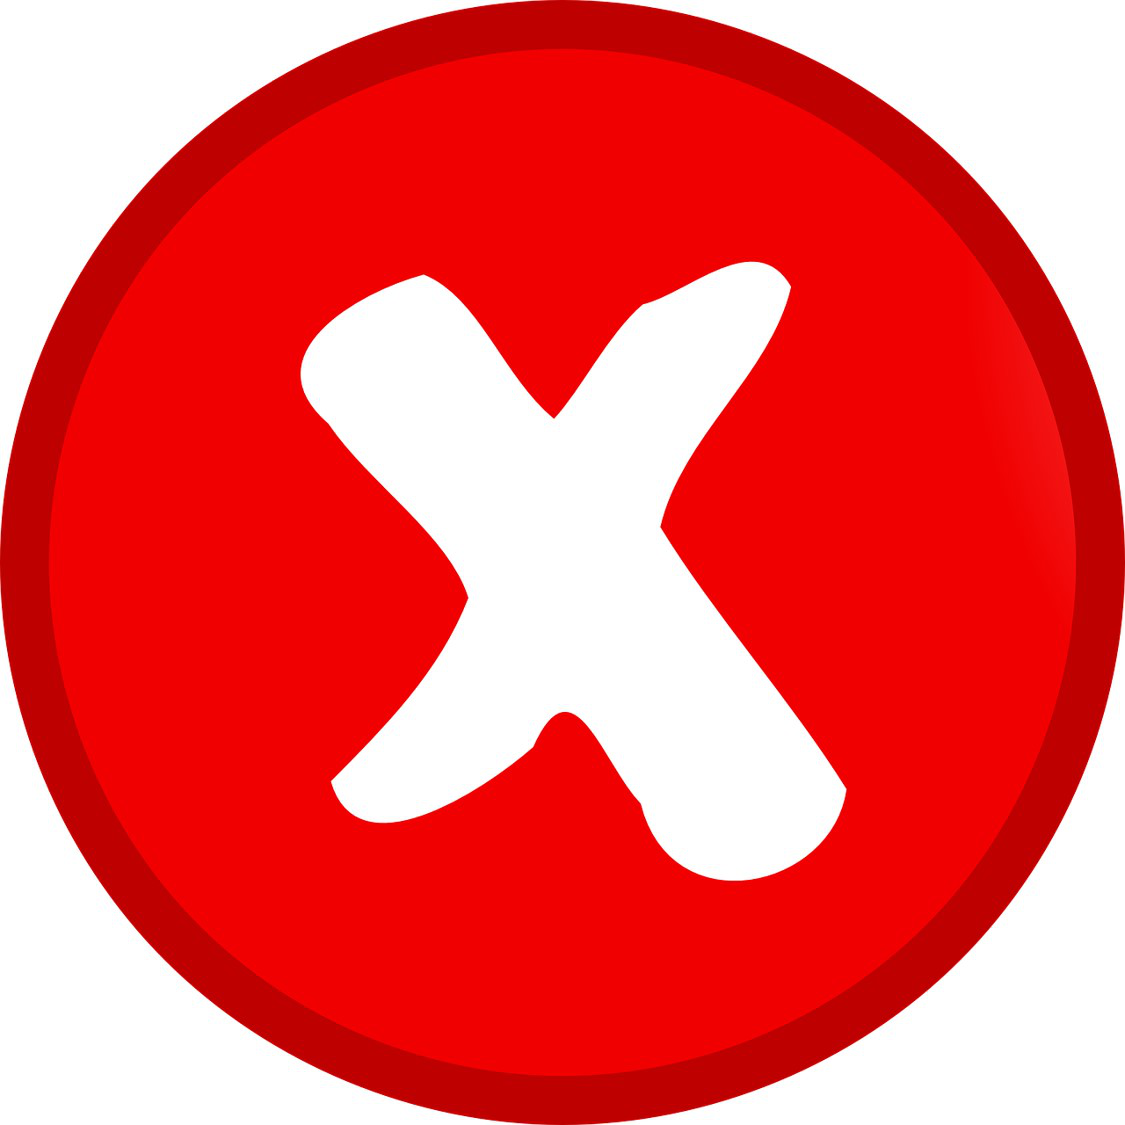

In [29]:
negativos = PIL.Image.open("desktop/archivos/negativo.jpg")

display(negativos)

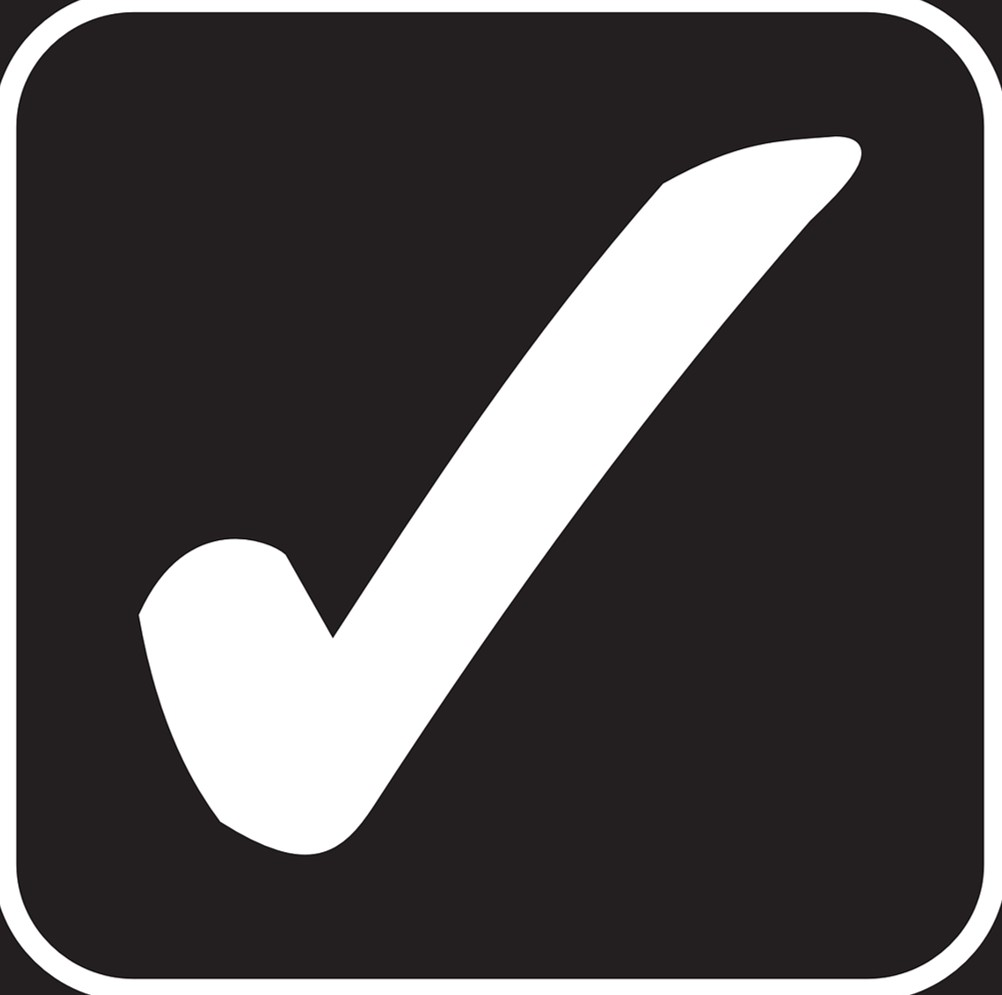

In [34]:
positivos = PIL.Image.open("desktop/archivos/positivos.jpg")

display(positivos)

In [35]:
mask1 = np.array(negativos)

mask2 = np.array(positivos)



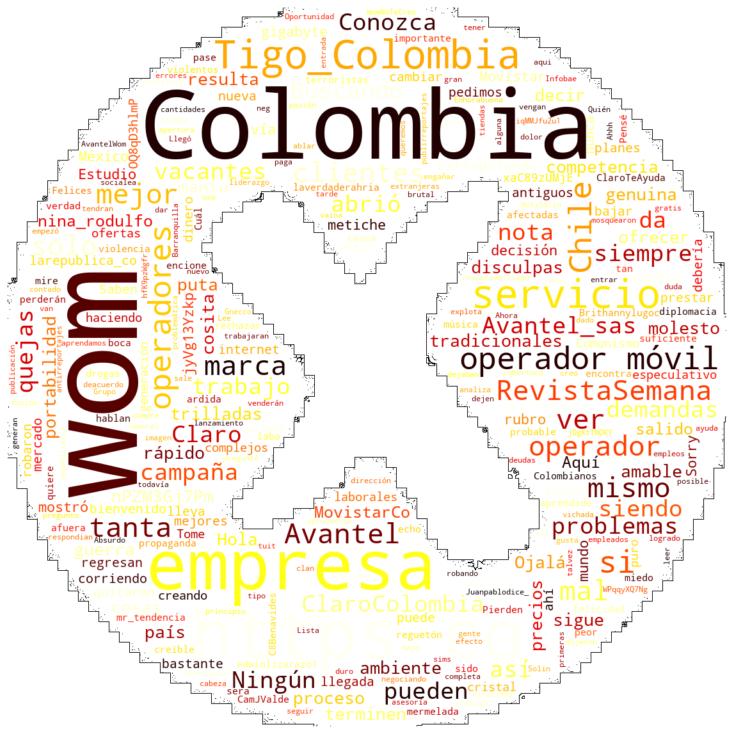

In [32]:
palabrasneg = negativo.tweet.str.cat(sep=' ')
wordcloud = WordCloud(random_state=1234, width=500, height=500,
                      max_font_size=200, max_words=300,
                      background_color='white', colormap='hot',
                      stopwords=stopwords, 
                      mask=mask1, contour_width=0.5, contour_color='black').generate(palabrasneg) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloud.to_file("negativo.jpg")


plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

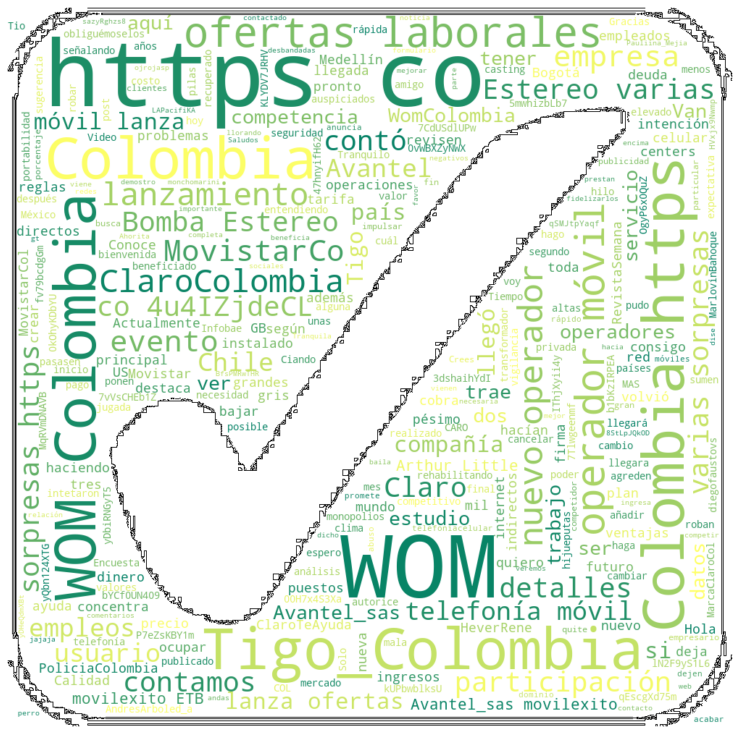

In [36]:
palabraspos = positivo.tweet.str.cat(sep=' ')
wordcloud = WordCloud(random_state=1234, width=500, height=500,
                      max_font_size=200, max_words=300,
                      background_color='white', colormap='summer',
                      stopwords=stopwords, 
                      mask=mask2, contour_width=0.5, contour_color='black').generate(palabraspos) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloud.to_file("positivos.jpg")


plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()